In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("/Users/francis/Downloads/netflix_titles.csv")

In [7]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [8]:
print(df.shape)

(6234, 12)


In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [14]:
for i in df.columns:
    null_rate = df[i].isna().sum()/len(df) * 100
    if null_rate > 0:
        print(f"{i}'s null rate: {null_rate}%")

director's null rate: 31.584857234520374%
cast's null rate: 9.143407122232915%
country's null rate: 7.635547000320821%
date_added's null rate: 0.17645171639396856%
rating's null rate: 0.16041065126724416%


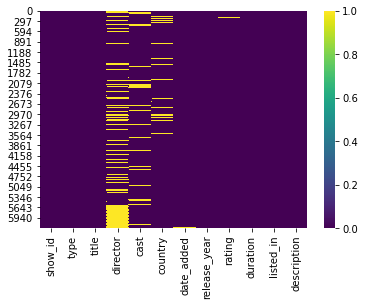

In [15]:
sns.heatmap(df.isnull(),cmap = "viridis")

In [19]:
df.describe(include = 'all').head(4)

show_id   type        title                director  \
count    6234.0   6234         6234                    4265   
unique      NaN      2         6172                    3301   
top         NaN  Movie  Oh My Ghost  Raúl Campos, Jan Suter   
freq        NaN   4265            3                      18   

                      cast        country       date_added  release_year  \
count                 5664           5758             6223        6234.0   
unique                5469            554             1524           NaN   
top     David Attenborough  United States  January 1, 2020           NaN   
freq                    18           2032              122           NaN   

       rating  duration      listed_in  \
count    6224      6234           6234   
unique     14       201            461   
top     TV-MA  1 Season  Documentaries   
freq     2027      1321            299   

                                              description  
count                                                6234  
unique                                               6226  
top     A surly septuagenarian gets another chance at ...  
freq                                                    3

In [77]:
data = df.fillna('Null')
data['year_added'] = data['date_added'].apply(lambda x : x.split(', ')[-1])
data['year_added'] = data['year_added'].apply(lambda x : x if x != 'Null' else '2020')
data['year_added'] = data['year_added'].apply(int)
data.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                      Null   
2                      Null   
3                      Null   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  year_added  
0  Before planning an awesome wedding for his gra...        2019  
1  Jandino Asporaat riffs on the challenges of ra...        2016  
2  With the help of three human allies, the Autob...        2018  
3  When a prison ship crash unleashes hundreds of...        2018  
4  When nerdy high schooler Dani finally attracts...        2017

In [78]:
data.drop(['director','cast'],axis = 1, inplace=True)

In [79]:
data.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  year_added  
0  Before planning an awesome wedding for his gra...        2019  
1  Jandino Asporaat riffs on the challenges of ra...        2016  
2  With the help of three human allies, the Autob...        2018  
3  When a prison ship crash unleashes hundreds of...        2018  
4  When nerdy high schooler Dani finally attracts...        2017

## Which country produces the most contents?

In [80]:
from collections import Counter
country_data = data['country']
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
country_counting.drop(['Null'],axis=0, inplace=True)

In [81]:
country_counting

United States     2610
India              838
United Kingdom     602
Canada             318
France             271
                  ... 
Sudan                1
Sri Lanka            1
Panama               1
Latvia               1
Cyprus               1
Length: 111, dtype: int64

In [82]:
top15_countries = country_counting[:15]

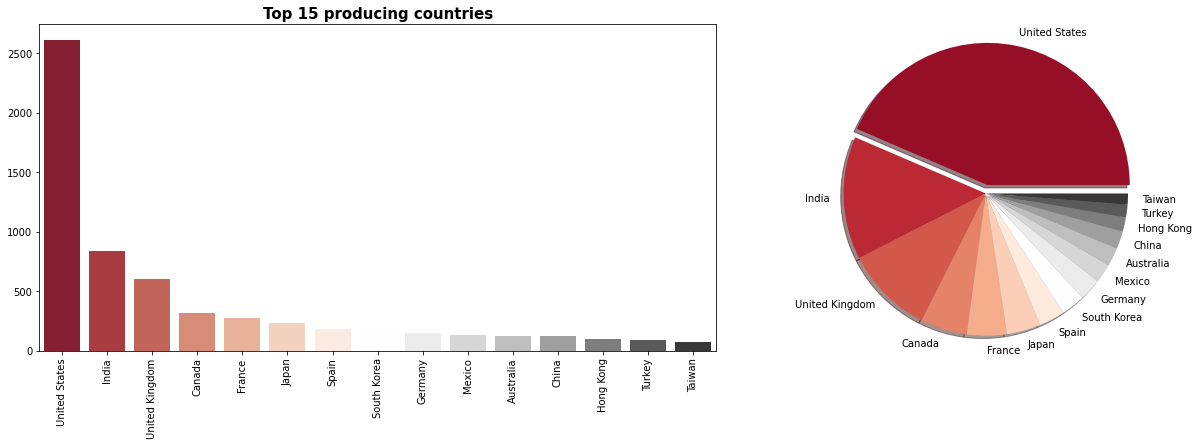

In [83]:
from matplotlib import gridspec

fig = plt.figure(figsize = (20,6))
gs = gridspec.GridSpec(nrows=1,ncols=2,
                      height_ratios=[6],
                      width_ratios=[10,5])

ax = plt.subplot(gs[0])
sns.barplot(top15_countries.index,top15_countries,ax=ax,palette='RdGy')
ax.set_xticklabels(top15_countries.index, rotation='90')
ax.set_title('Top 15 producing countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(15)]
explode[0]=0.06

ax2 = plt.subplot(gs[1])
ax2.pie(top15_countries, labels = top15_countries.index, shadow = True, startangle = 0, explode=explode,
       colors=sns.color_palette('RdGy', n_colors = 15))

ax2.axis('equal')

plt.show()


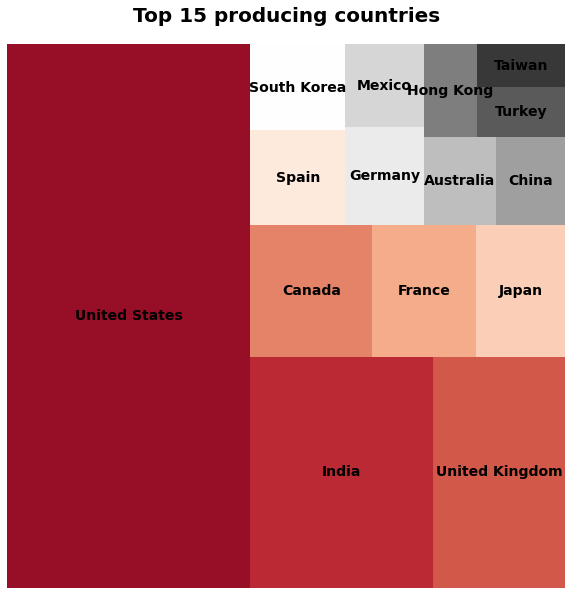

In [84]:
import squarify

y = top15_countries
fig = plt.figure(figsize = (10,10))
squarify.plot(sizes = y.values, label = y.index, color = sns.color_palette('RdGy', n_colors=15),
             linewidth = 4,text_kwargs={'fontsize':14,'fontweight':'bold'})

plt.title('Top 15 producing countries',position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

## Comparison by country for time 

In [85]:
import altair as alt

In [86]:
data['country'] = data['country'].dropna().apply(lambda x : x.replace(' ,',',').replace(', ',',').split(','))
lst_col = 'country'
data2 = pd.DataFrame({
    col: np.repeat(data[col].values,data[lst_col].str.len())
    for col in data.columns.drop(lst_col)
}).assign(**{lst_col:np.concatenate(data[lst_col].values)})[data.columns.tolist()]

In [88]:
year_country = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')
year_country['top15'] = year_country['country'].apply(lambda x : x in top15_countries.index)

In [90]:
year_country = year_country[(year_country['year_added']>=1990) & year_country['top15'] & (year_country['year_added']<2020)]

In [91]:
alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack = 'center', axis = None),
    alt.Color('country:N',
        scale=alt.Scale(scheme='redgrey'),
        sort=list(top15_countries.index)
    ),
).properties(
    height=350,
    width=600
)

alt.Chart(...)

In [93]:
import plotly.express as px

year_country2 = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')

In [95]:
fig = px.choropleth(year_country2, locations='country', color='counts',
                   locationmode='country names',
                   animation_frame='year_added',
                   color_continuous_scale=px.colors.sequential.OrRd)
fig.update_layout(title='Comparison by country')
fig.show()

## Movie and TV shows (Genre)

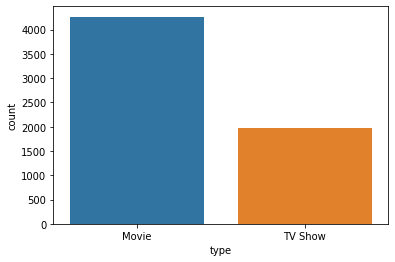

In [96]:
sns.countplot(x='type',data=df)

In [102]:
from sklearn.preprocessing import MultiLabelBinarizer

In [103]:
def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
    
    plt.show()

In [115]:
movie = df[df['type']=="Movie"]
tv_show = df[df['type']=="TV Show"]

There are 20 types in the Netflix Movie Dataset


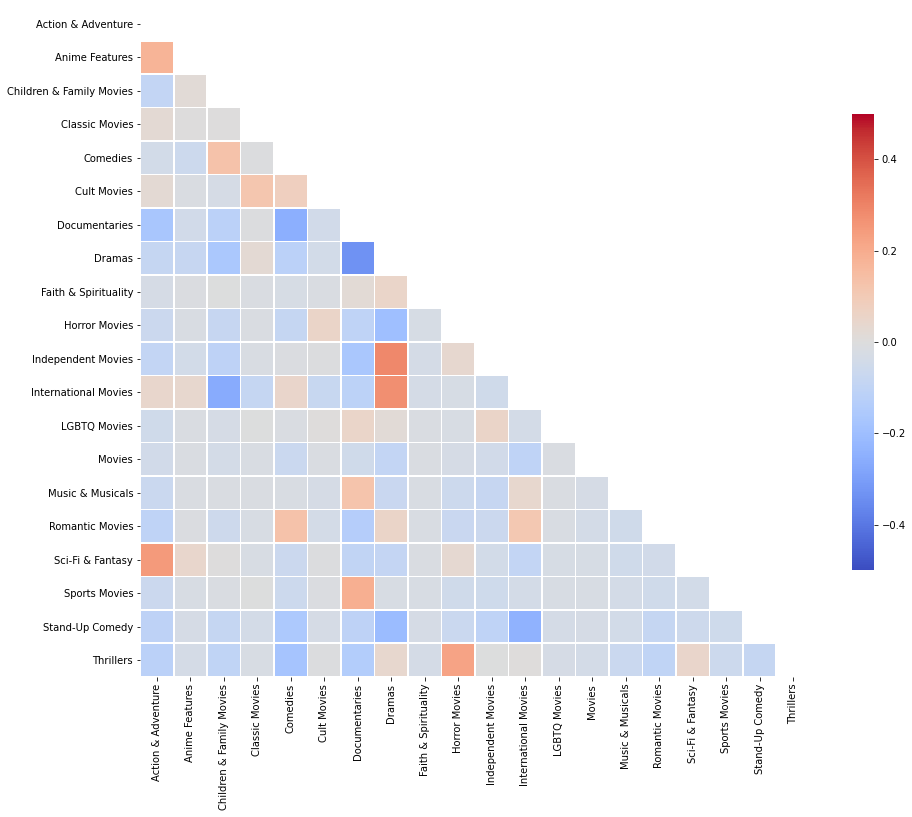

In [116]:
relation_heatmap(movie,'Movie')

There are 22 types in the Netflix TV Show Dataset


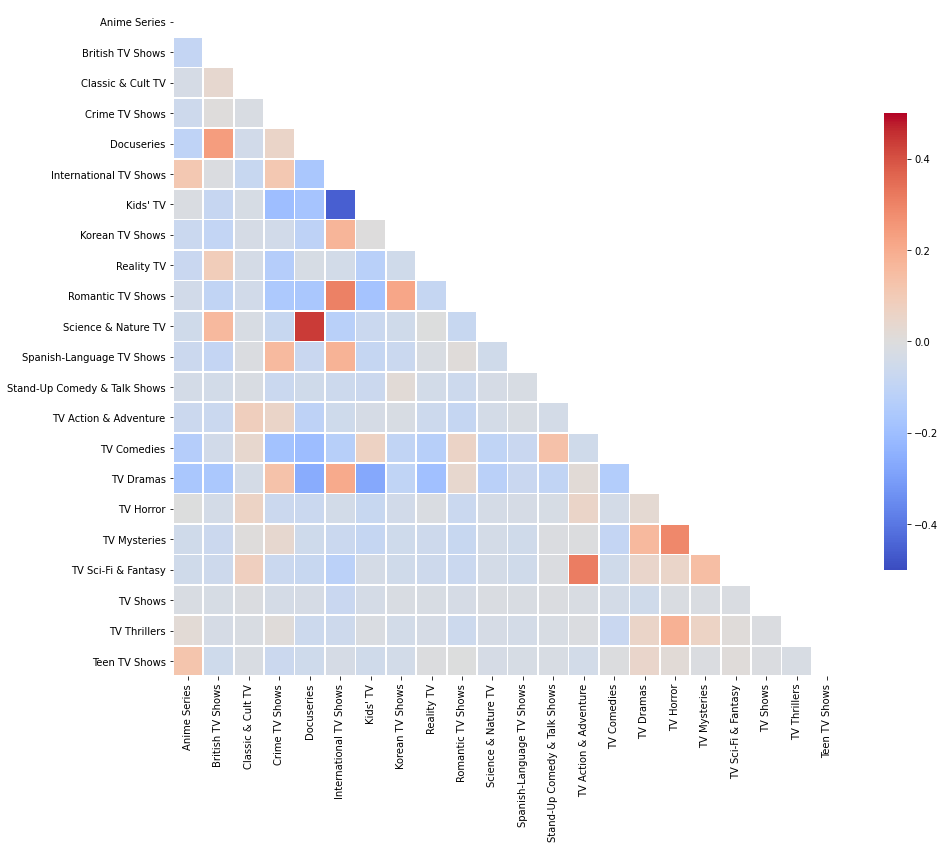

In [117]:
relation_heatmap(tv_show,'TV Show')

## Rating Distribution

In [132]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

movie_rating = movie['rating'].value_counts()[rating_order]
tv_rating = tv_show['rating'].value_counts().reindex(rating_order).fillna(0)

In [133]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

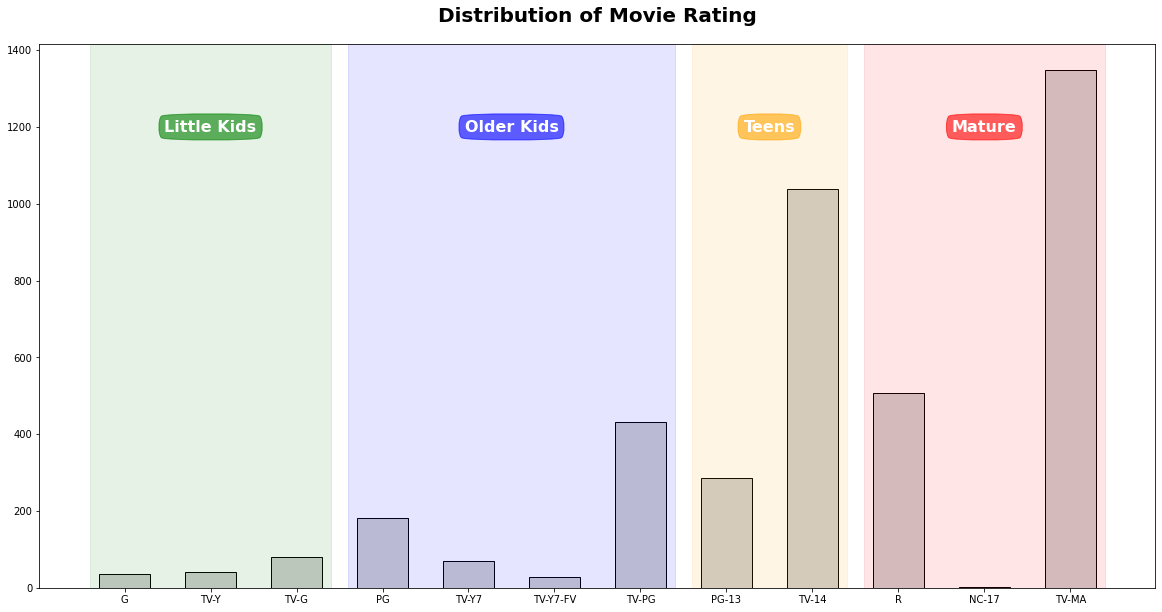

In [135]:
rating_barplot(movie_rating,'Movie',1200)

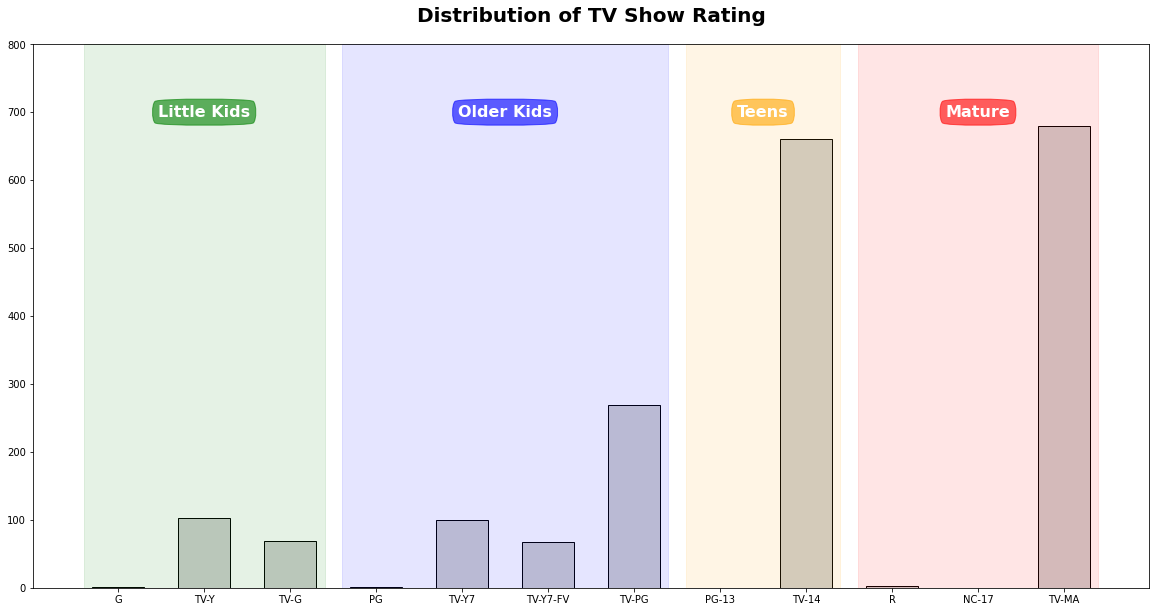

In [136]:
rating_barplot(tv_rating,'TV Show',700,800)

In [137]:
rating_data = data[['rating', 'type']].groupby('type')['rating'].value_counts().unstack().fillna(0)[rating_order].T
rating_data = pd.DataFrame(pd.concat([rating_data['Movie'], rating_data['TV Show']])).reset_index().rename(columns={'rating':'rating',0:'cnt'})
rating_data['type'] = rating_data.index//12

In [138]:
base = alt.Chart(rating_data).transform_calculate(
    type=alt.expr.if_(alt.datum.type == 0, 'Movie', 'TV Show')
).properties(
    height=300,
    width=300
)


color_scale = alt.Scale(domain=['Movie', 'TV Show'], range=['skyblue', 'salmon'])

left = base.transform_filter(
    alt.datum.type == 'Movie'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q',
            title='population',
            sort=alt.SortOrder('descending')),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Movie')

middle = base.encode(
    y=alt.Y('rating', axis=None, sort=rating_order),
    text=alt.Text('rating'),
).mark_text().properties(width=30)

right = base.transform_filter(
    alt.datum.type == 'TV Show'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q', title='population'),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='TV Show')

alt.concat(left, middle, right, spacing=5)

alt.ConcatChart(...)

In [139]:
from wordcloud import WordCloud

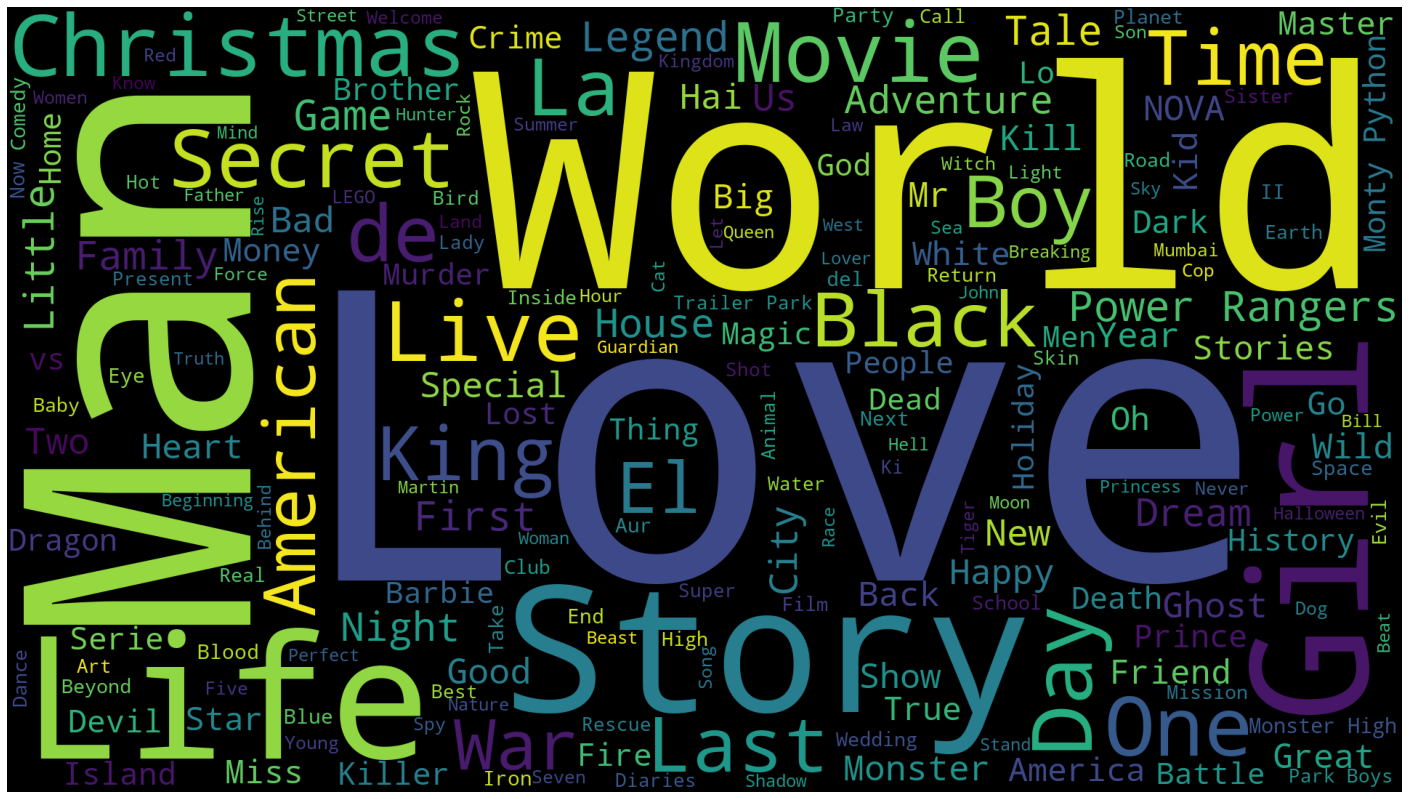

In [140]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                background_color='Black',
                width=1920,
                height=1080,
                ).generate(" ".join(df.title))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()